In [1]:
# Import the drive module from google.colab
from google.colab import drive

# Mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Load a CSV file from your Google Drive
data = pd.read_csv('/content/drive/MyDrive/KALYAN_Thesis_work_PhD/June_2024/june_draft/stand13_torque_attention_Signals_for_attension_based_torque_model_csv.csv')
print(data.head())


   Time  [9.226]  [12:44]  [9:13]  [9:14]  [9:15]  [9:16]  [9:17]  [9:47]  \
0     1        0       84       3      34      38      39      26     999   
1     2        0       84       5      34      38      38      26    1001   
2     3        0       84       7      35      39      39      27    1000   
3     4        0       84       6      34      38      38      26     999   
4     5        0       84       6      34      38      39      26     999   

   [9:48]  ...  [12:62]  [12:63]  [12:64]  [13:0]   [9:76]  [12:19]  [12:20]  \
0    1566  ...      552      580      475     700  22.9189       33     1119   
1    1570  ...      509      531      459     700  23.1155       34     1120   
2    1568  ...      531      541      451     700  23.7248       33     1120   
3    1567  ...      530      532      462     700  23.8034       33     1119   
4    1566  ...      539      549      471     700  24.0983       33     1120   

   [12:21]  [12:69]  [9:12]  
0     3018      941      2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Check the data types and missing values
print(data.info())

# Get basic statistics of the dataset
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51884 entries, 0 to 51883
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     51884 non-null  int64  
 1   [9.226]  51884 non-null  int64  
 2   [12:44]  51884 non-null  int64  
 3   [9:13]   51884 non-null  int64  
 4   [9:14]   51884 non-null  int64  
 5   [9:15]   51884 non-null  int64  
 6   [9:16]   51884 non-null  int64  
 7   [9:17]   51884 non-null  int64  
 8   [9:47]   51884 non-null  int64  
 9   [9:48]   51884 non-null  int64  
 10  [9:49]   51884 non-null  int64  
 11  [9:50]   51884 non-null  int64  
 12  [9:51]   51884 non-null  int64  
 13  [9:52]   51884 non-null  int64  
 14  [9:53]   51884 non-null  int64  
 15  [9:54]   51884 non-null  int64  
 16  [9:55]   51884 non-null  int64  
 17  [9:56]   51884 non-null  int64  
 18  [9:57]   51884 non-null  int64  
 19  [9:58]   51884 non-null  int64  
 20  [9:64]   51884 non-null  float64
 21  [9:65]   518

In [4]:
# Assuming the time column is named 'time' and the target variable is the last column
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Get the name of the target variable
target_var = data.columns[-1]

print(f'Target variable: {target_var}')


Target variable: [9:12]


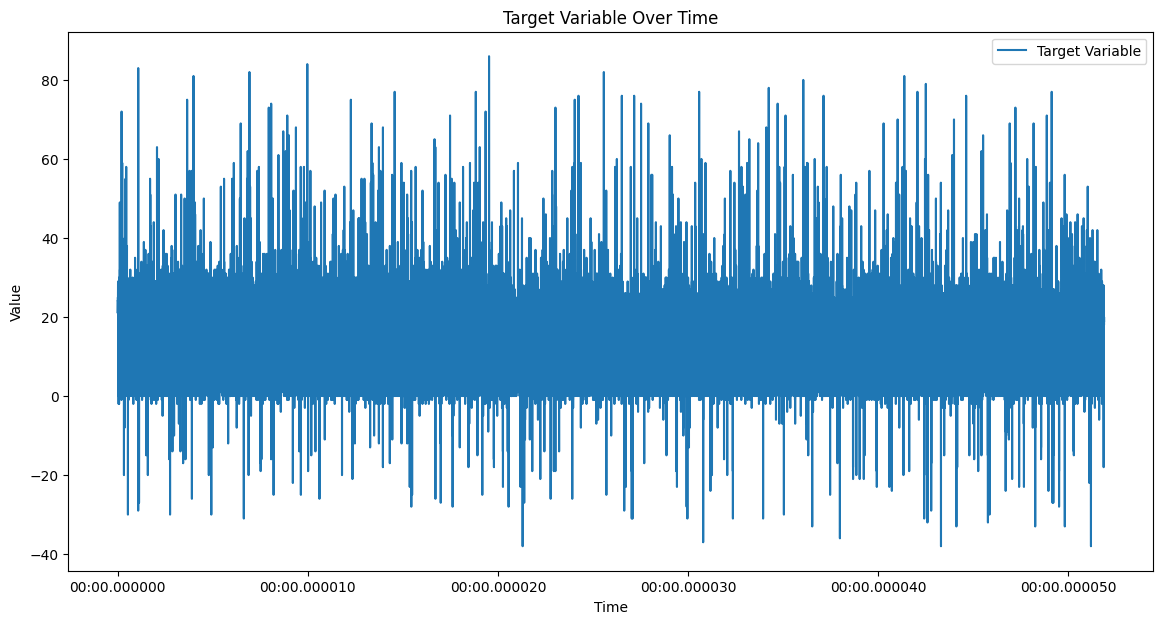

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(data[target_var], label='Target Variable')
plt.title('Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
data.plot(subplots=True, figsize=(120, 240))
plt.suptitle('Features and Target Variable Over Time')
plt.show()


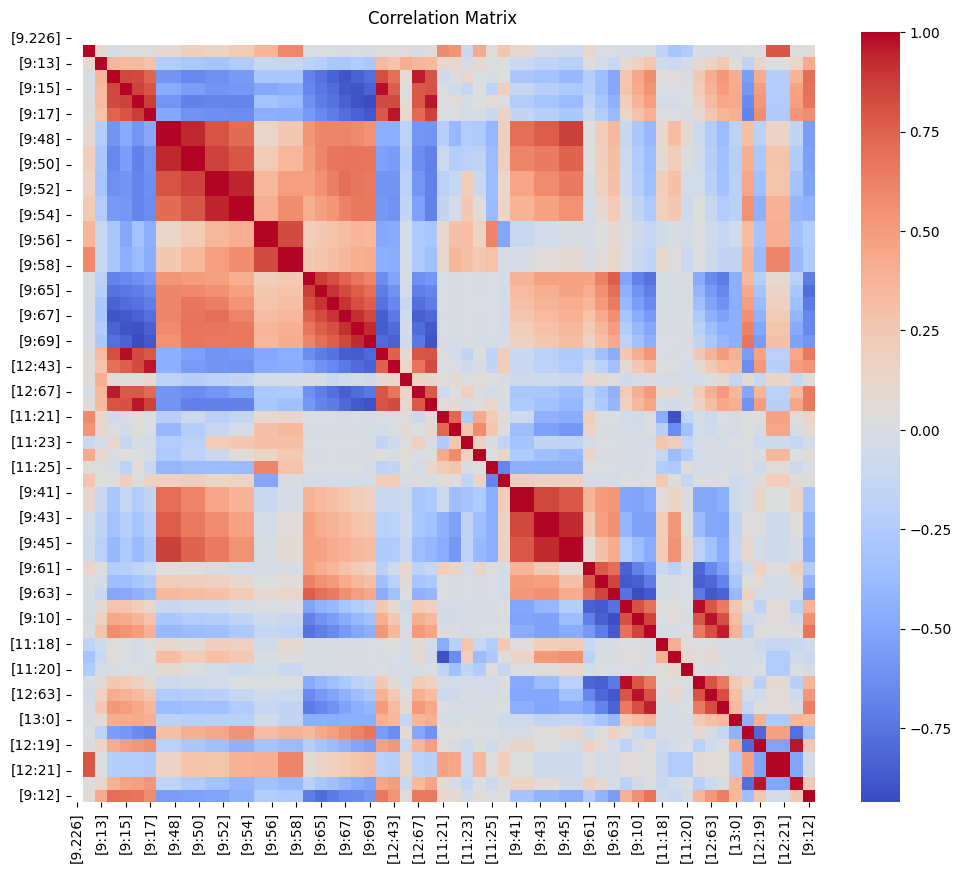

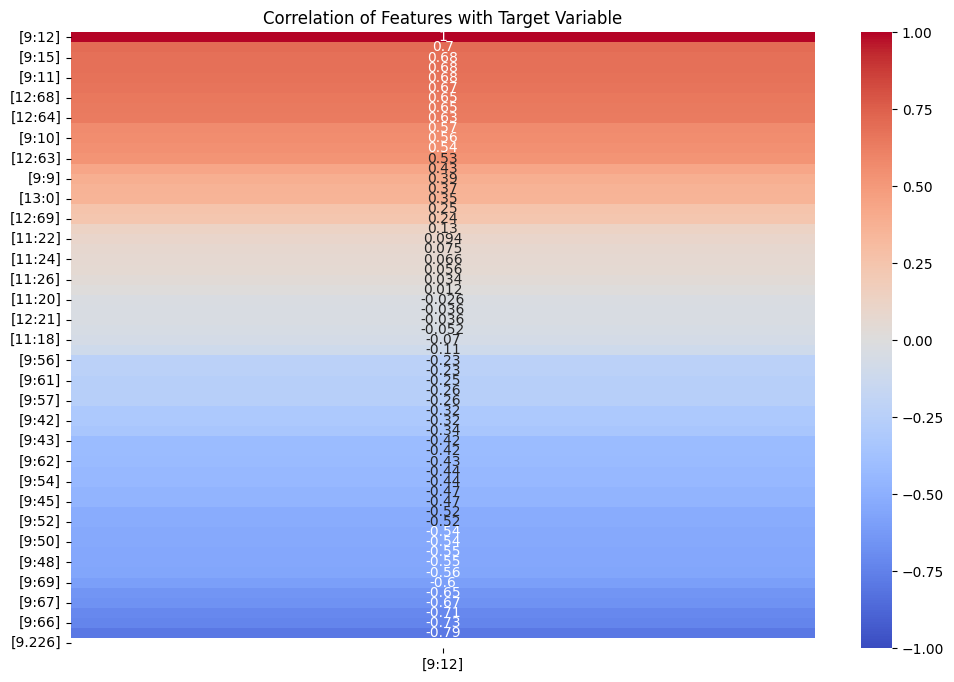

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on the correlation of features with the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[[target_var]].sort_values(by=target_var, ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Target Variable')
plt.show()


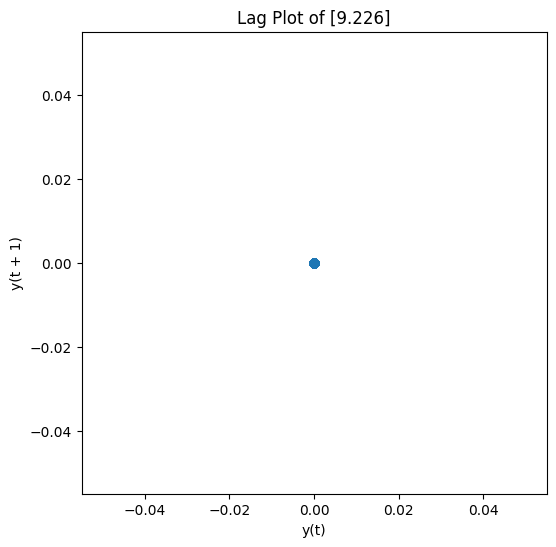

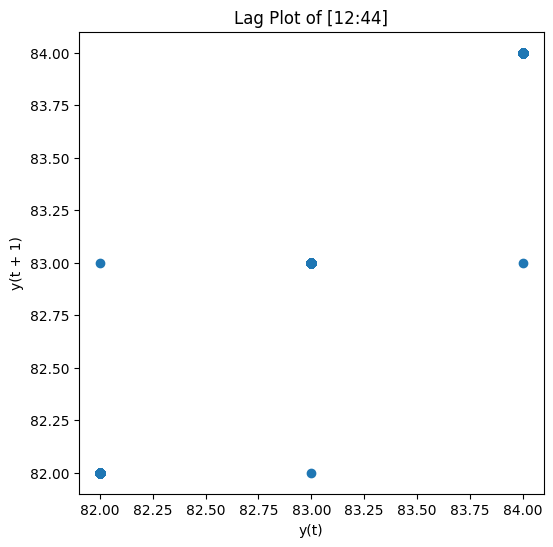

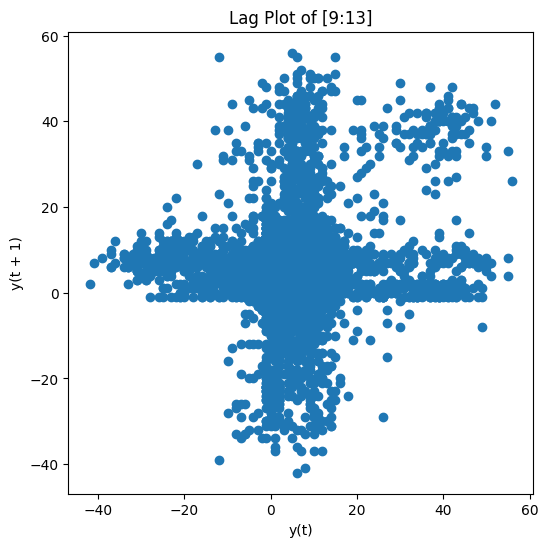

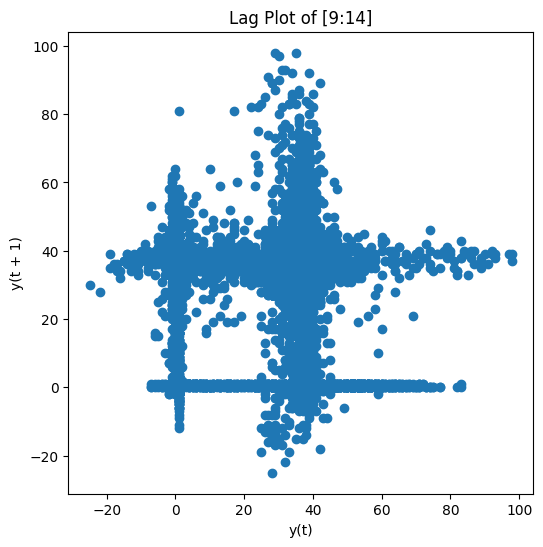

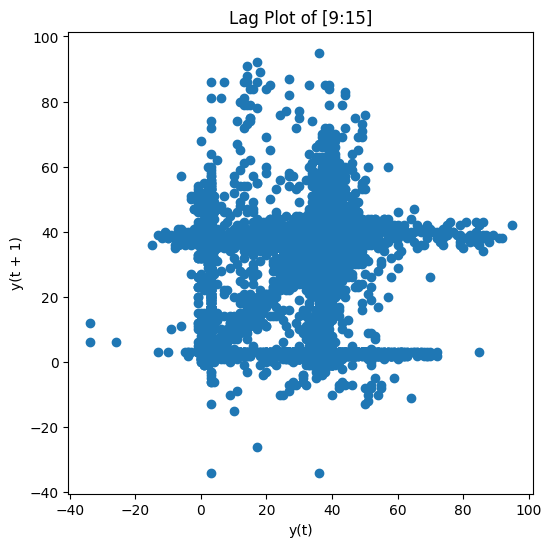

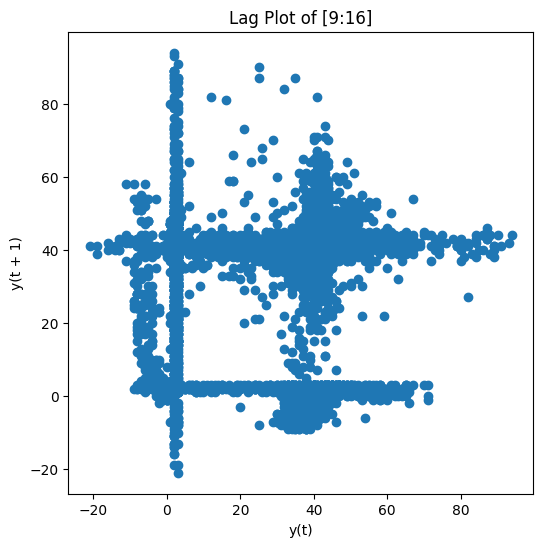

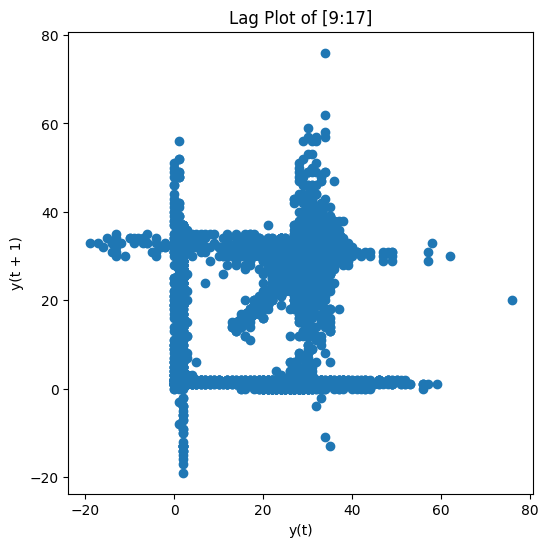

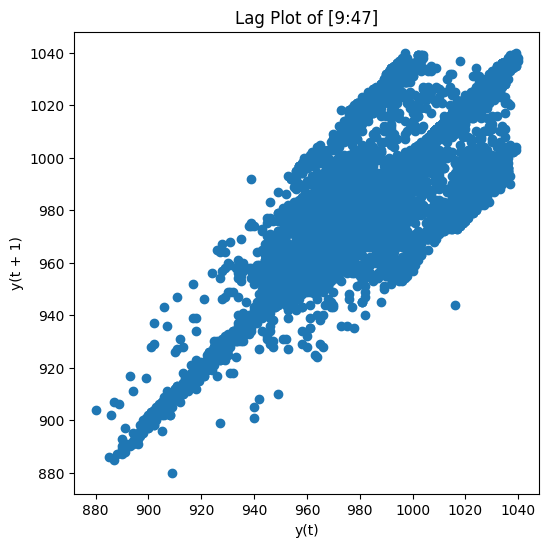

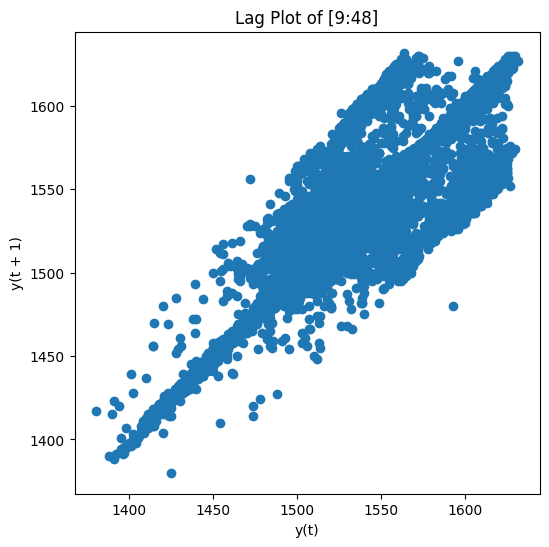

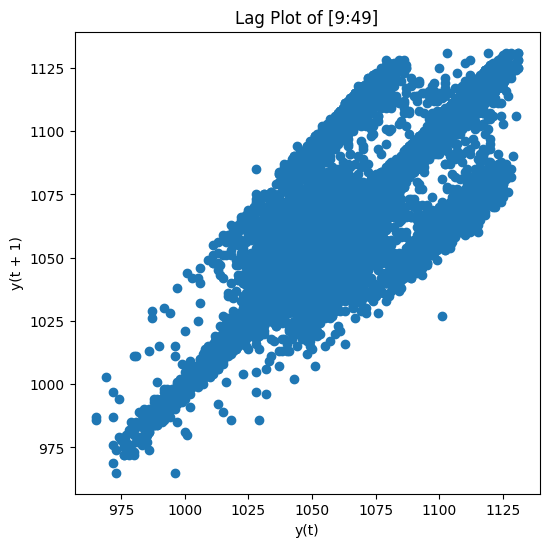

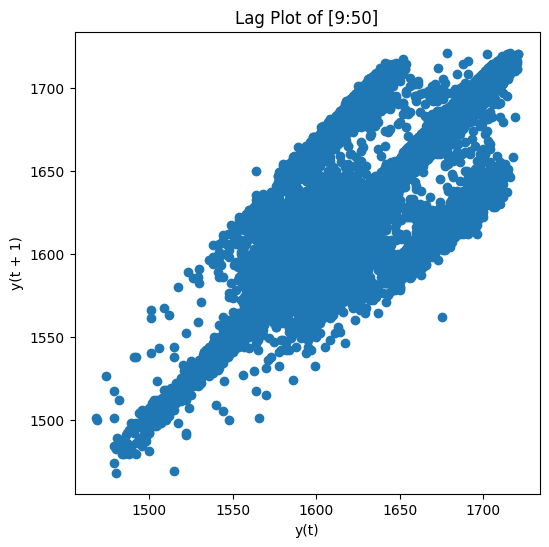

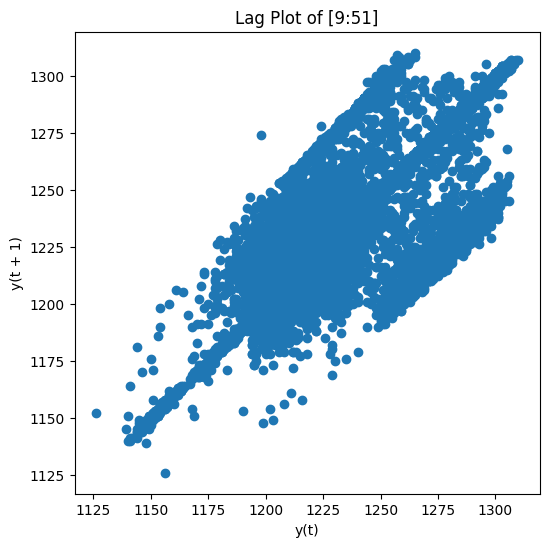

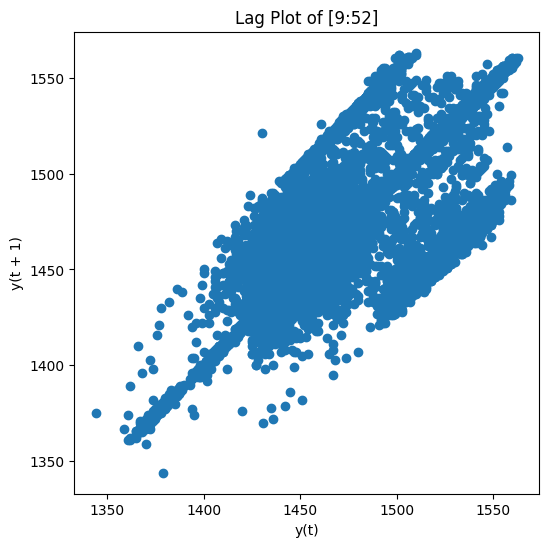

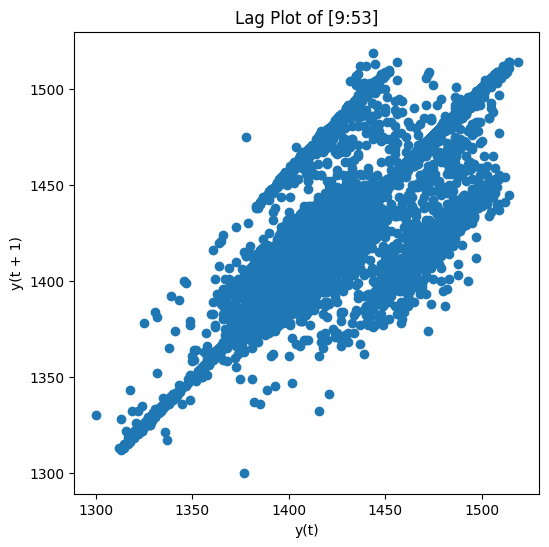

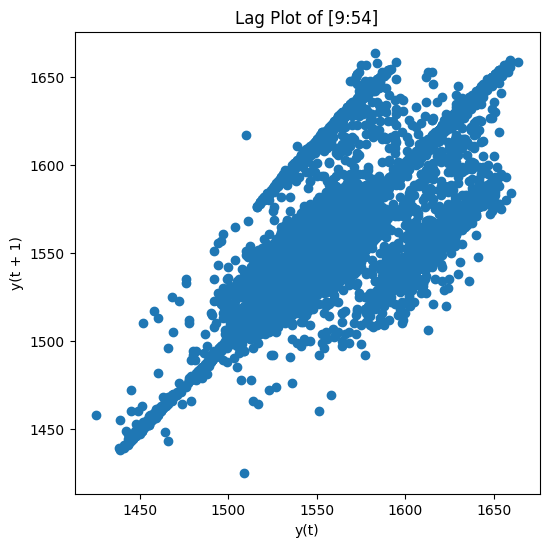

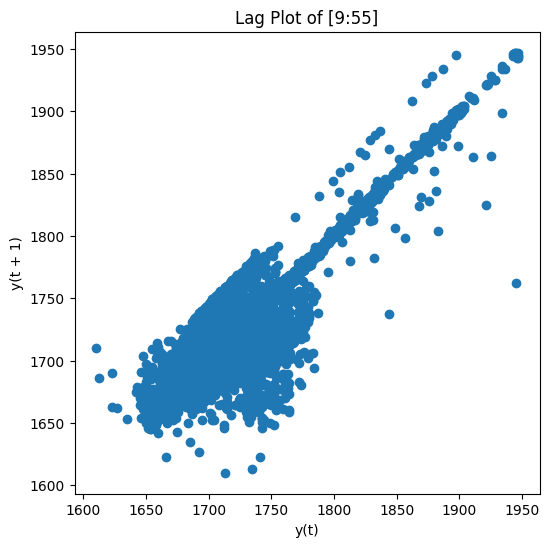

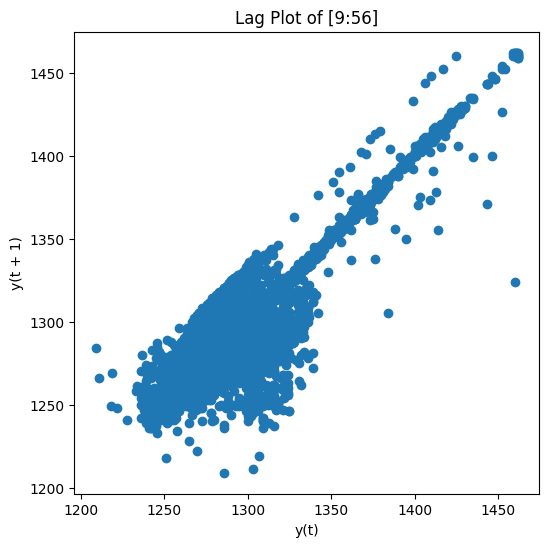

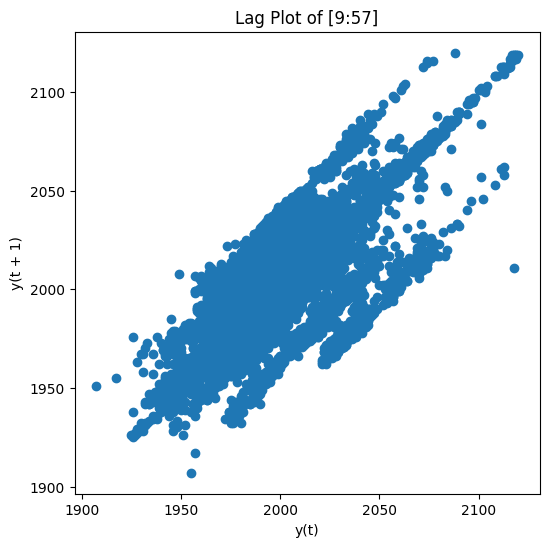

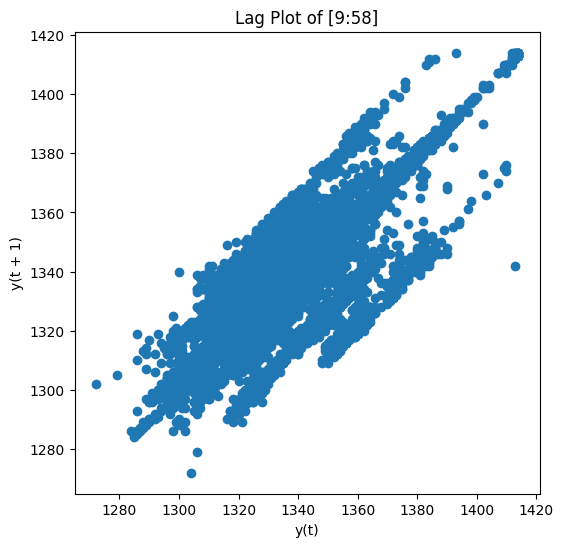

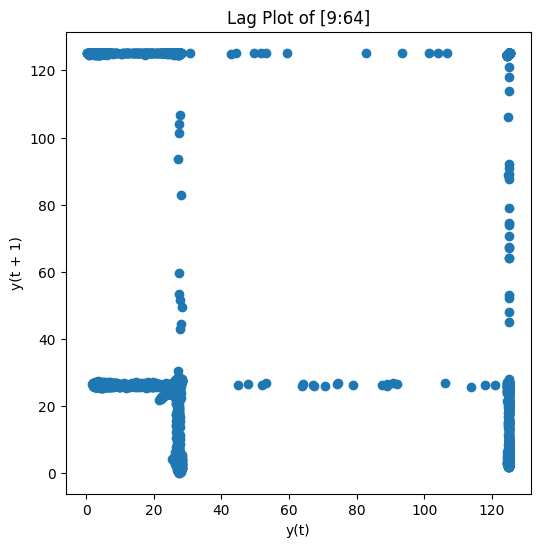

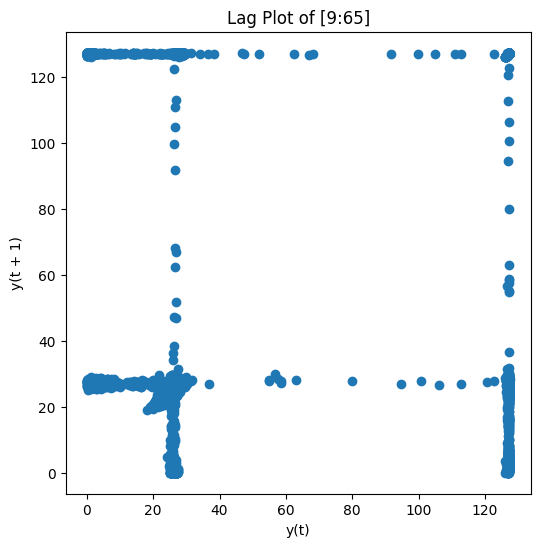

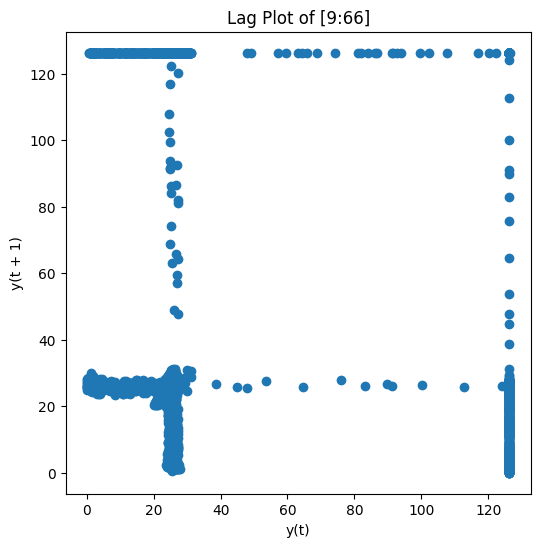

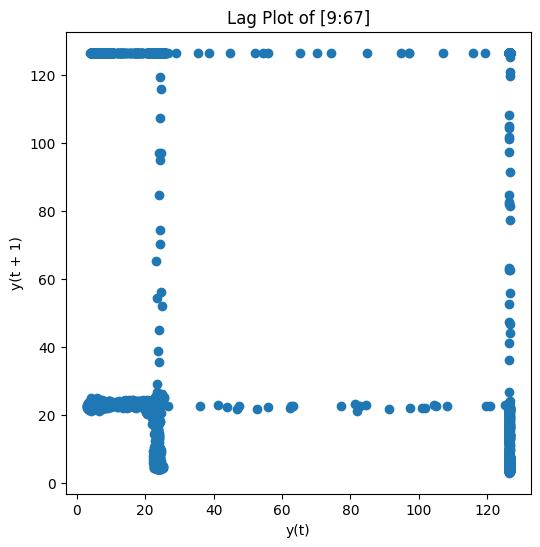

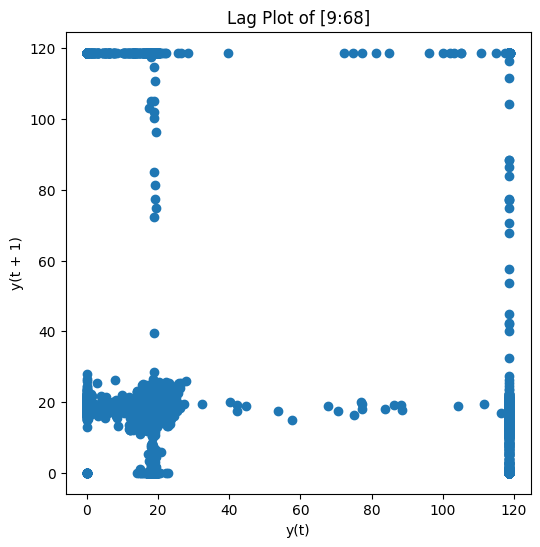

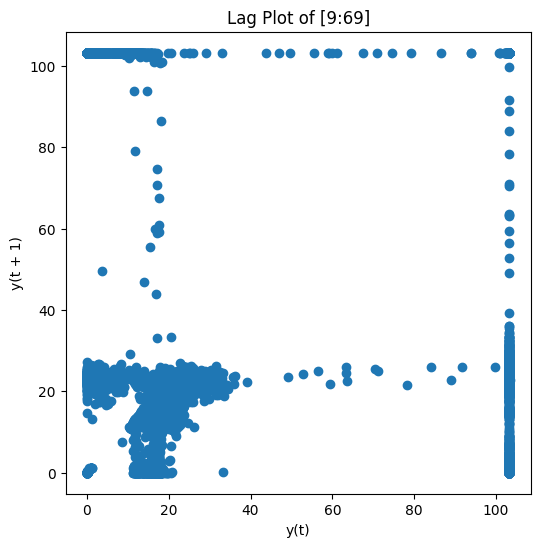

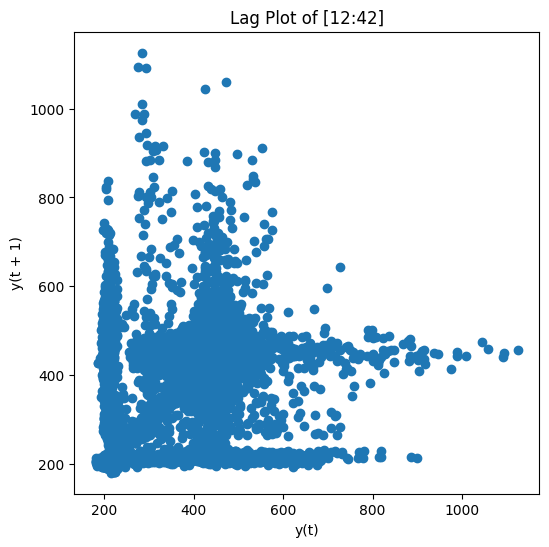

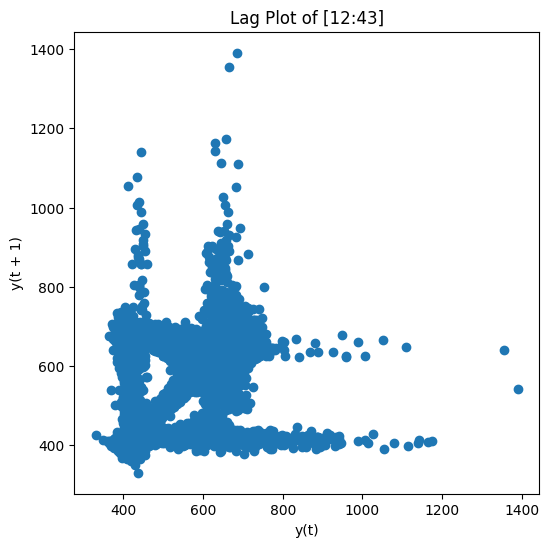

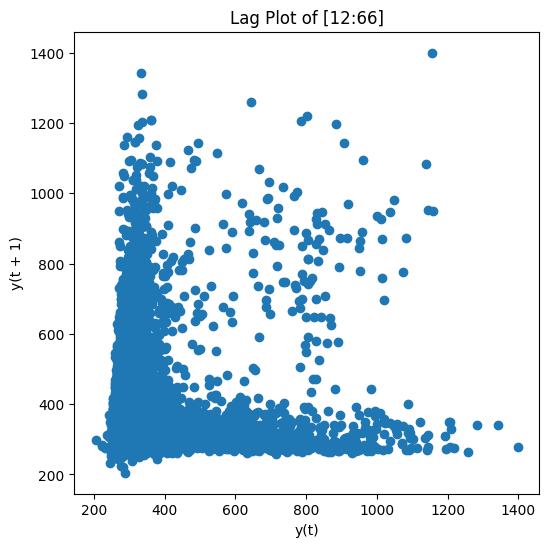

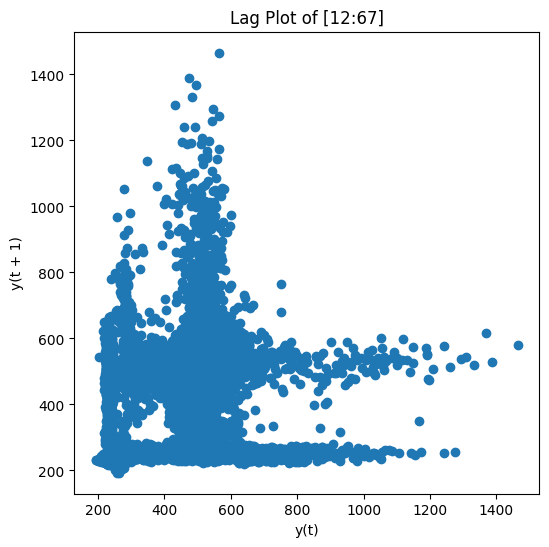

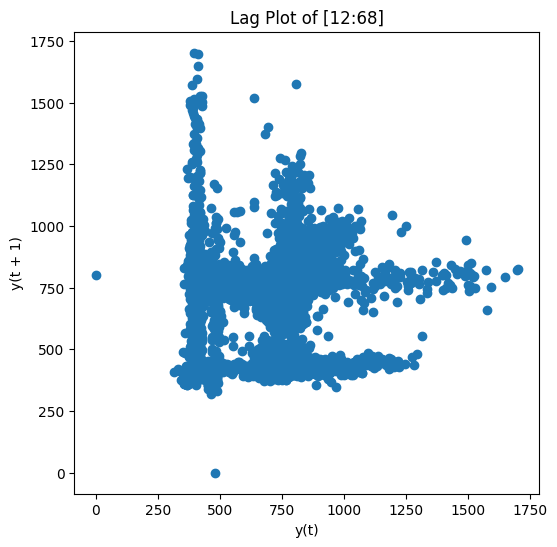

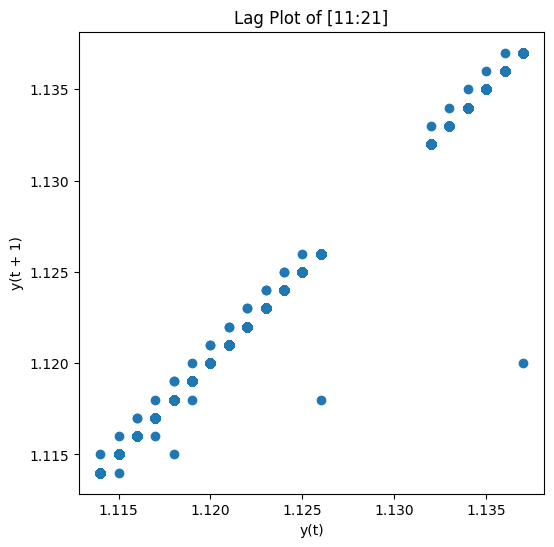

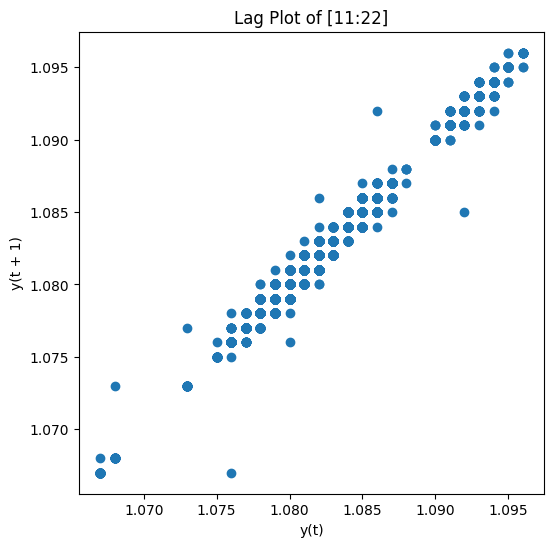

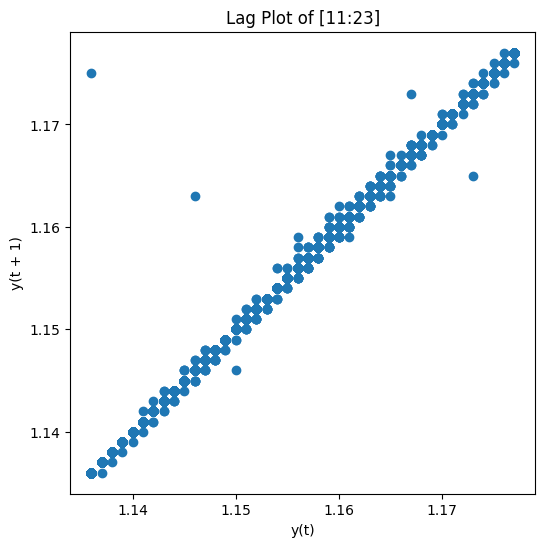

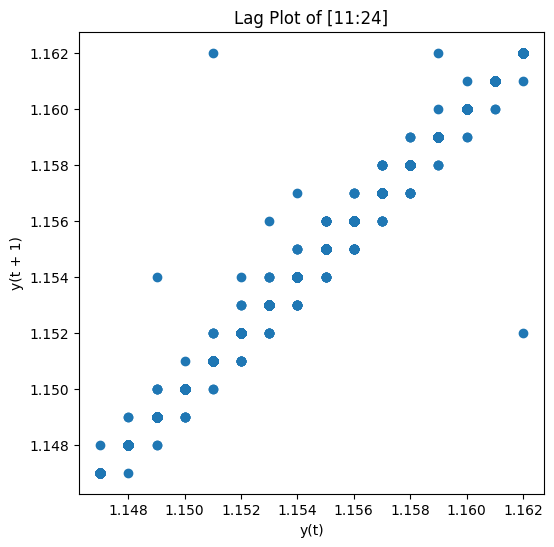

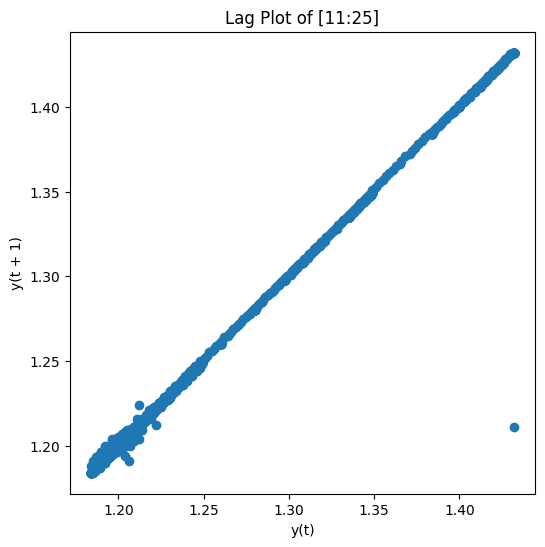

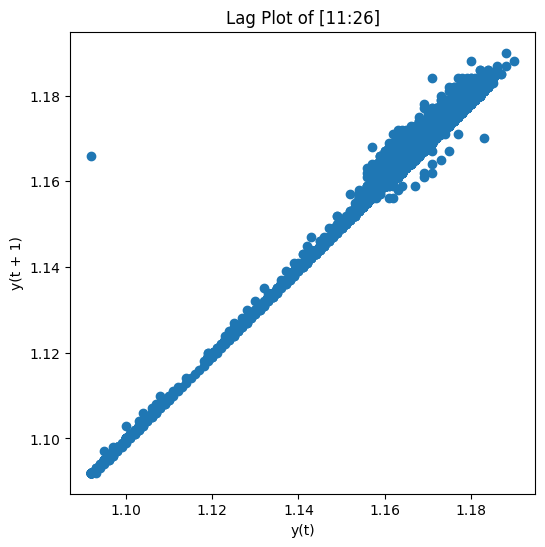

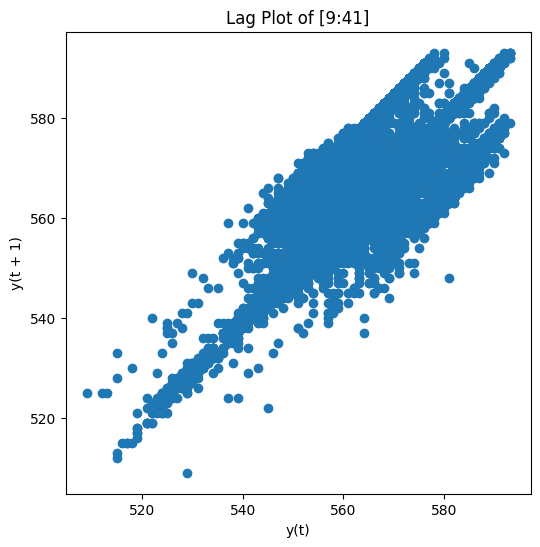

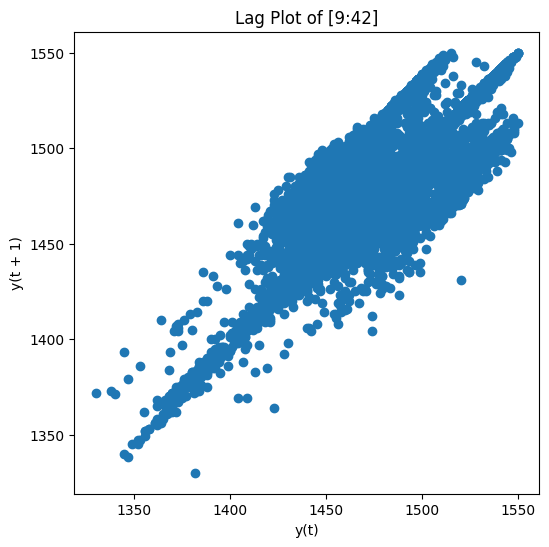

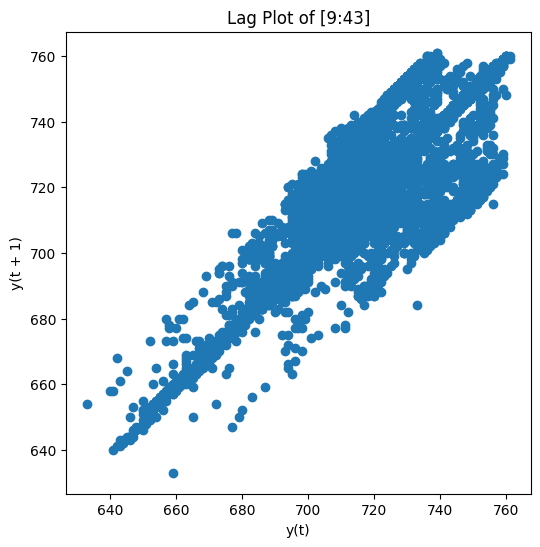

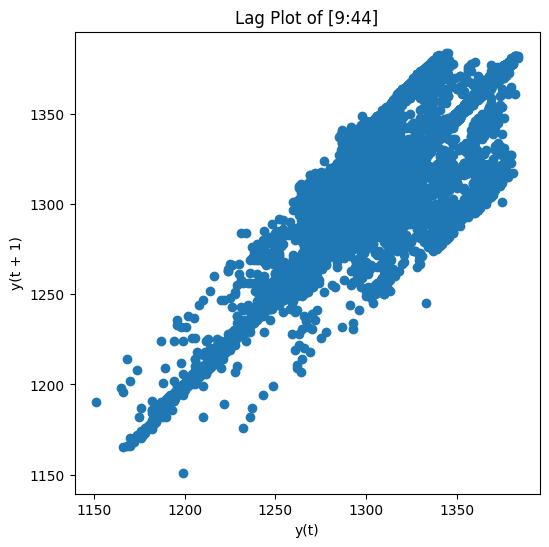

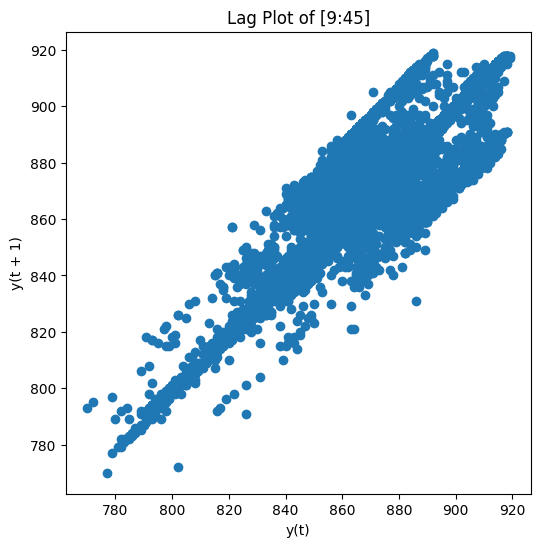

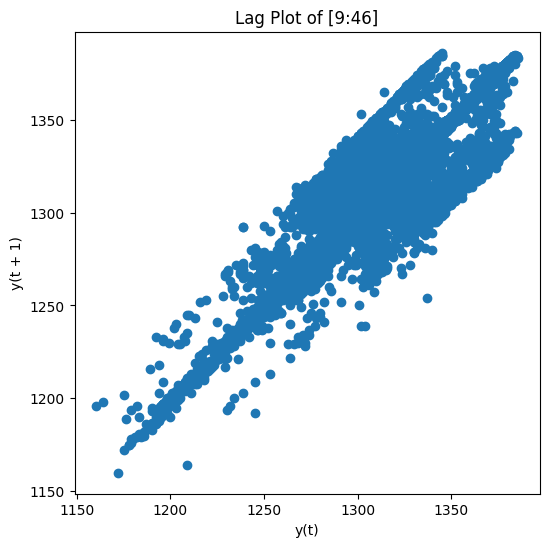

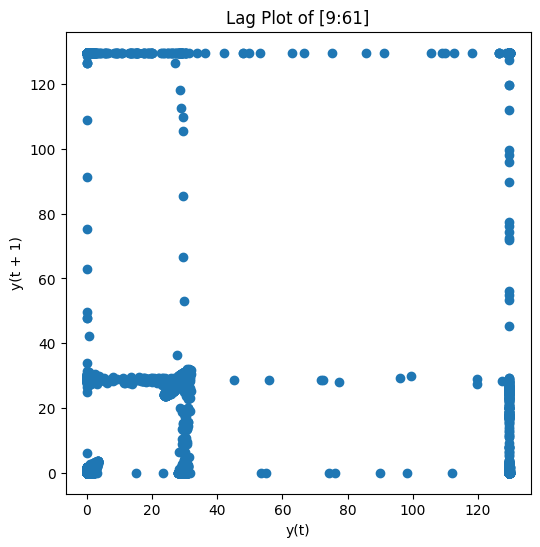

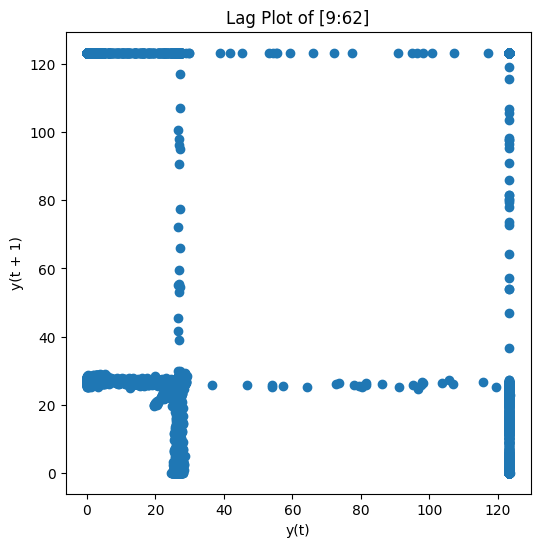

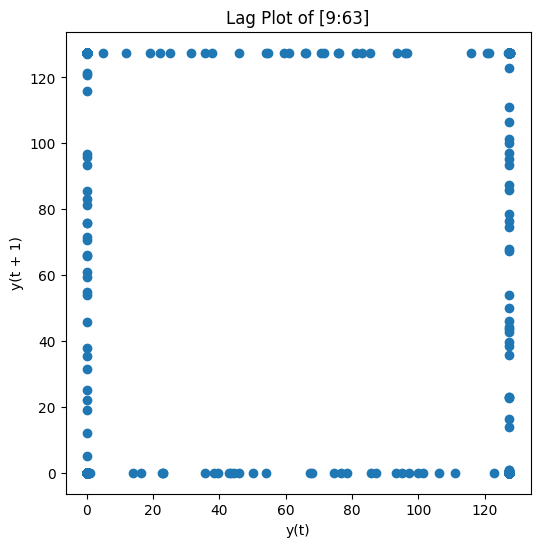

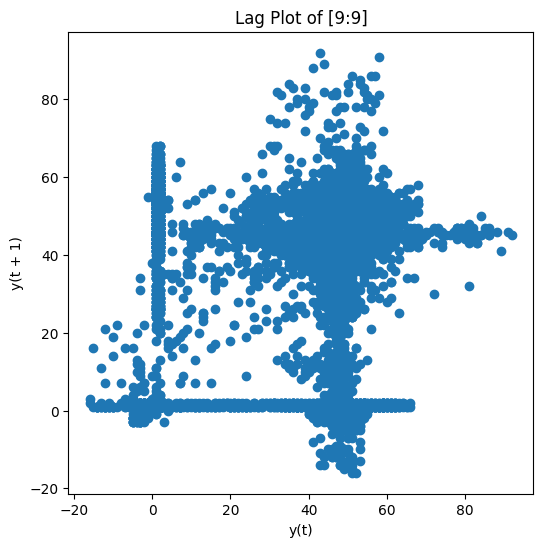

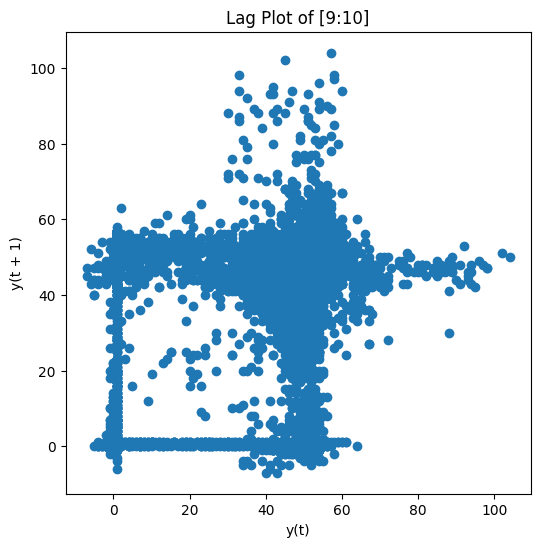

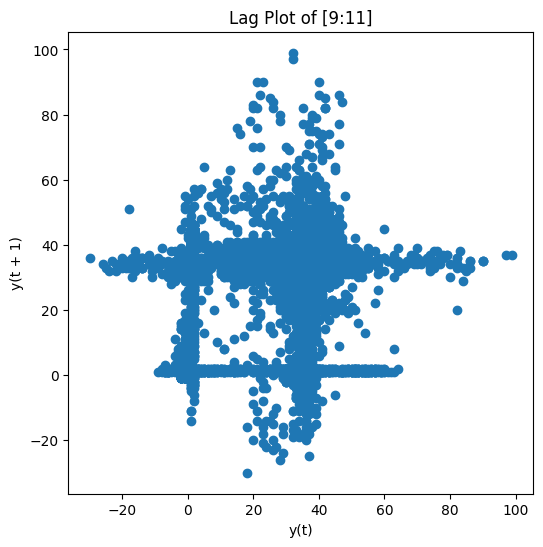

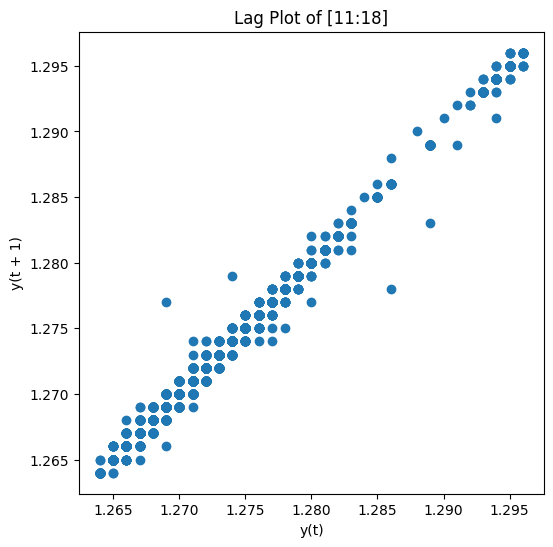

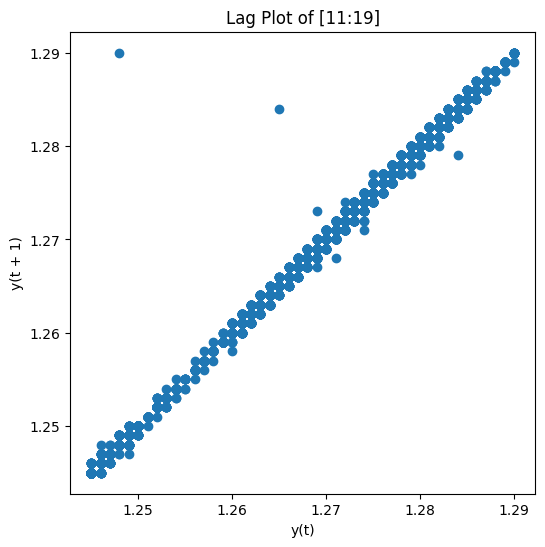

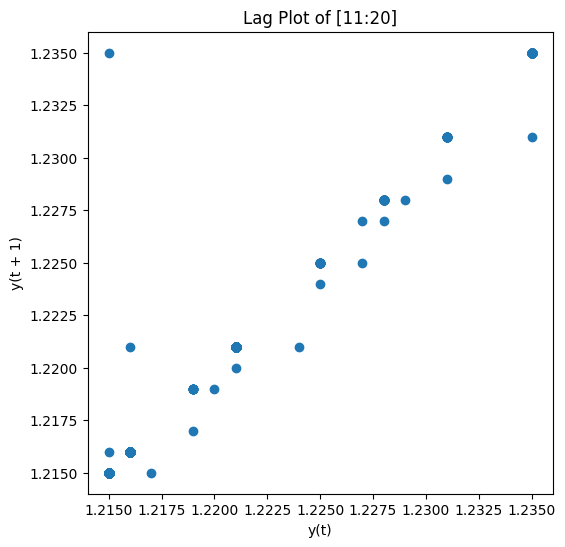

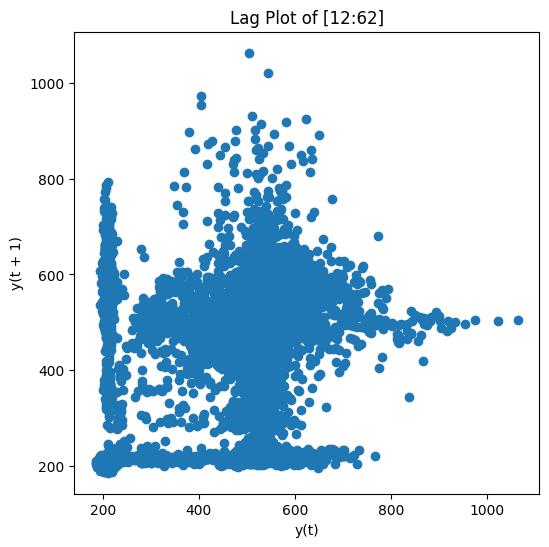

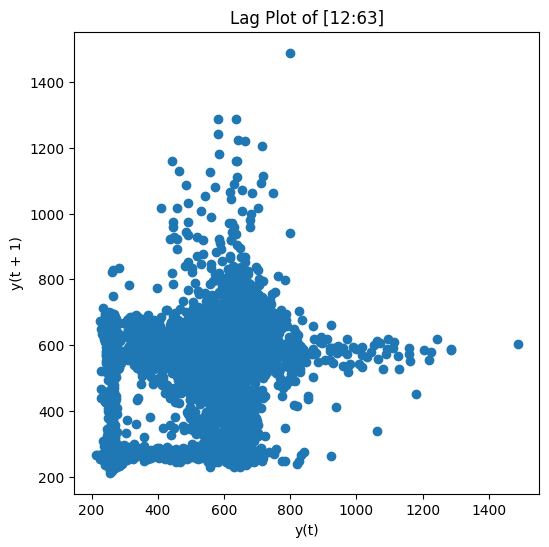

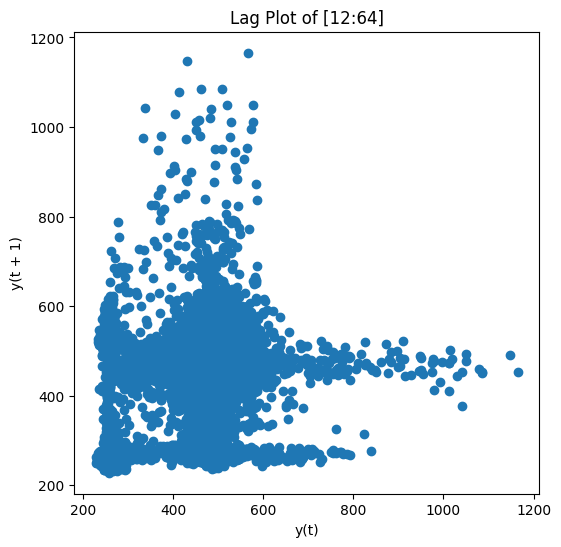

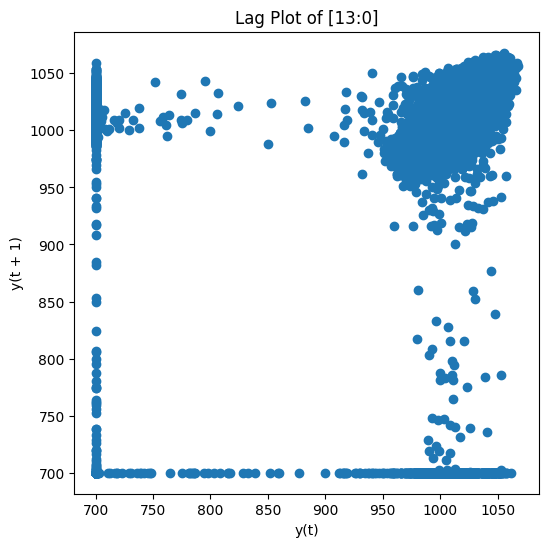

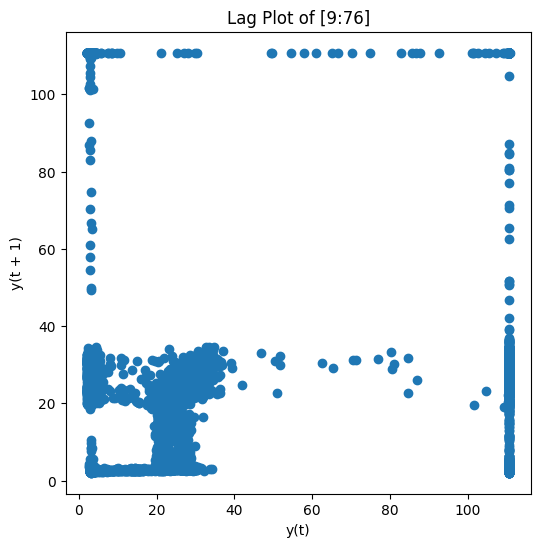

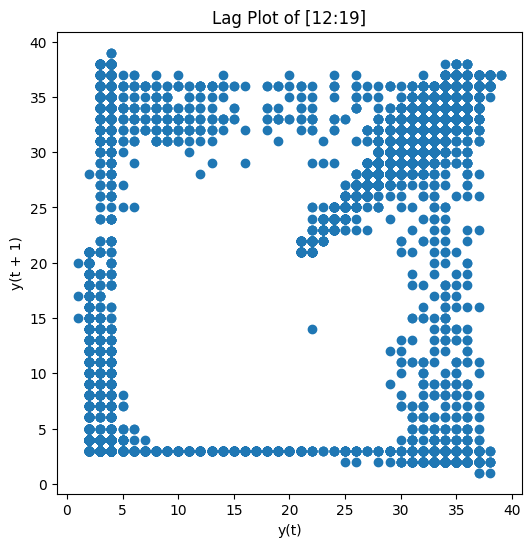

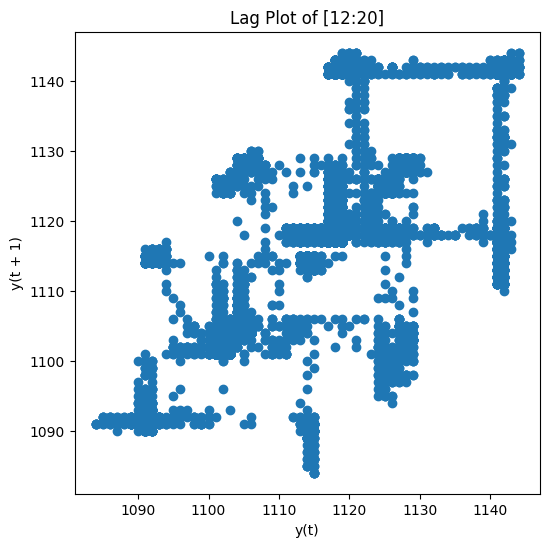

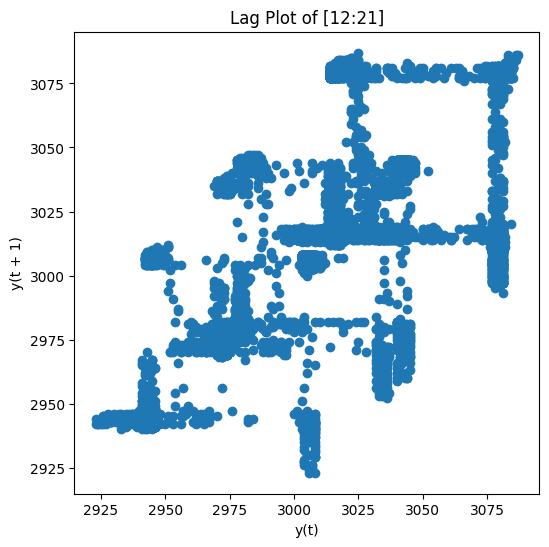

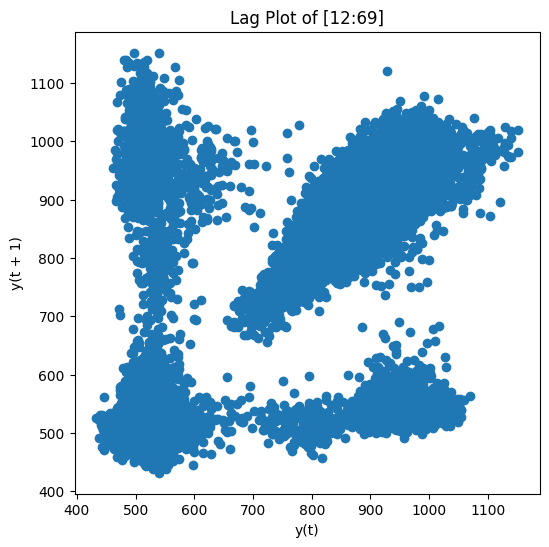

In [ ]:
from pandas.plotting import lag_plot

# Create lag plots for each feature
for column in data.columns[:-1]:  # exclude the target variable
    plt.figure(figsize=(6, 6))
    lag_plot(data[column], lag=1)
    plt.title(f'Lag Plot of {column}')
    plt.show()


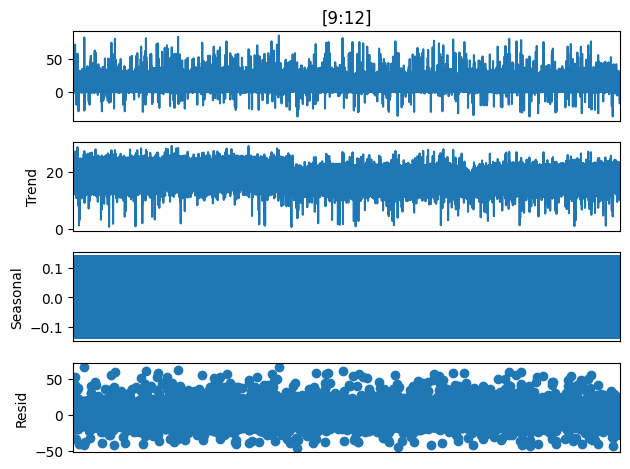

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the target variable
result = seasonal_decompose(data[target_var], model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()


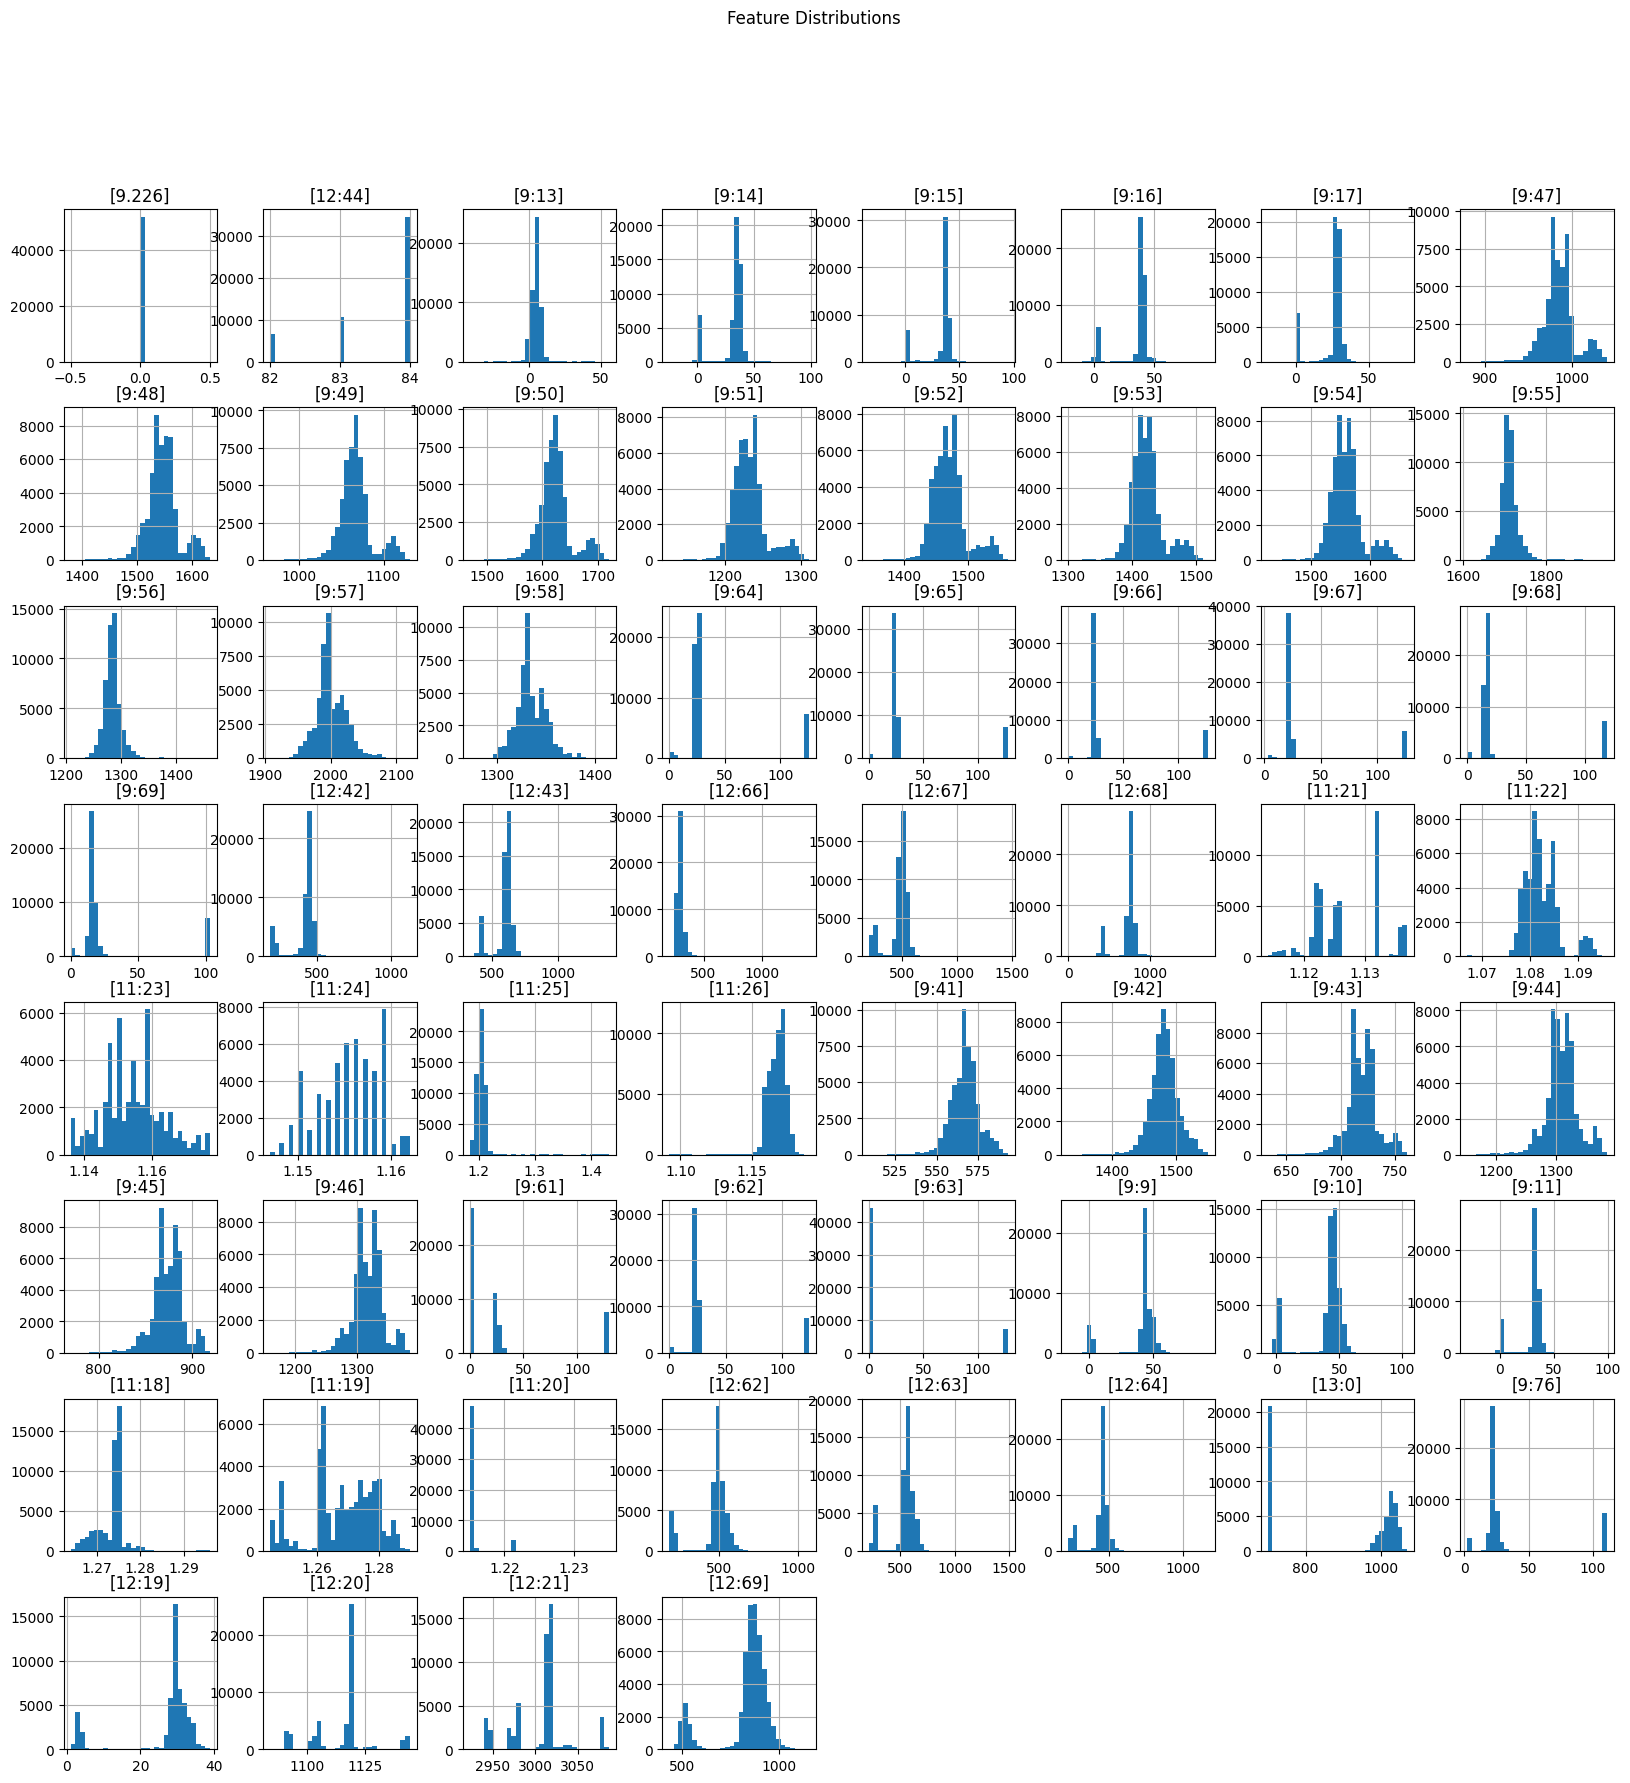

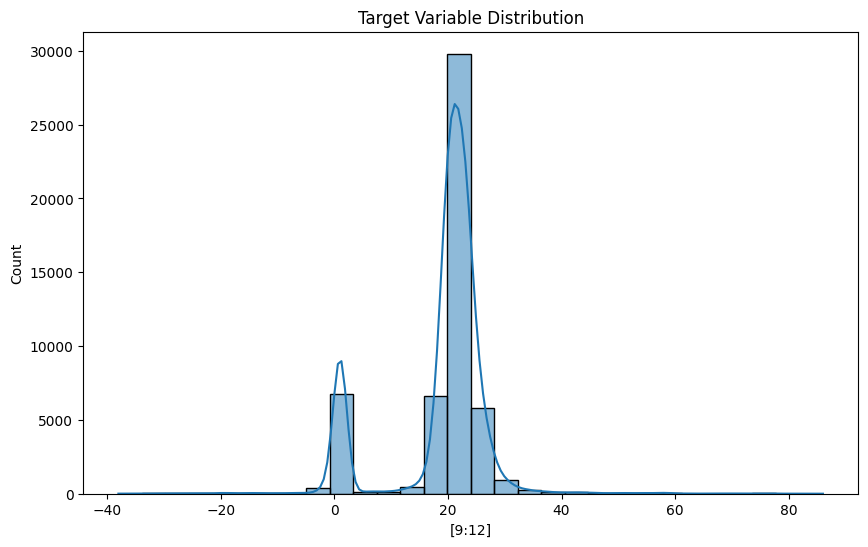

In [ ]:
# Plot distributions of features
data.iloc[:, :-1].hist(bins=30, figsize=(20, 20))
plt.suptitle('Feature Distributions')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[target_var], bins=30, kde=True)
plt.title('Target Variable Distribution')
plt.show()


In [7]:
pip install torch transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [8]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/KALYAN_Thesis_work_PhD/June_2024/june_draft/stand13_torque_attention_Signals_for_attension_based_torque_model_csv.csv')

# Convert time column to datetime and set as index
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Get the name of the target variable
target_var = data.columns[-1]

# Split features and target
X = data.drop(columns=[target_var]).values
y = data[target_var].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [11]:
import torch.nn as nn
import torch.optim as optim

# Define model parameters
num_features = X_train_tensor.shape[1]
num_heads = 4
num_layers = 2

class TimeSeriesTransformer(nn.Module):
    def __init__(self, num_features, num_heads, num_layers, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=num_features, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.linear = nn.Linear(num_features, 1)

    def forward(self, src):
        src = src.permute(1, 0, 2)  # (seq_len, batch_size, num_features)
        transformer_out = self.transformer_encoder(src)
        transformer_out = transformer_out.permute(1, 0, 2)  # (batch_size, seq_len, num_features)
        out = self.linear(transformer_out[:, -1, :])  # Predicting the target for the last time step
        return out



# Initialize the model
model = TimeSeriesTransformer(num_features, num_heads, num_layers)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
# Training loop
num_epochs = 500
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor.unsqueeze(1))
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/500], Loss: 284.6947
Epoch [20/500], Loss: 266.9209
Epoch [30/500], Loss: 248.7860
Epoch [40/500], Loss: 230.2859
Epoch [50/500], Loss: 211.3931
Epoch [60/500], Loss: 192.1730
Epoch [70/500], Loss: 171.0556
Epoch [80/500], Loss: 151.3473
Epoch [90/500], Loss: 132.2182


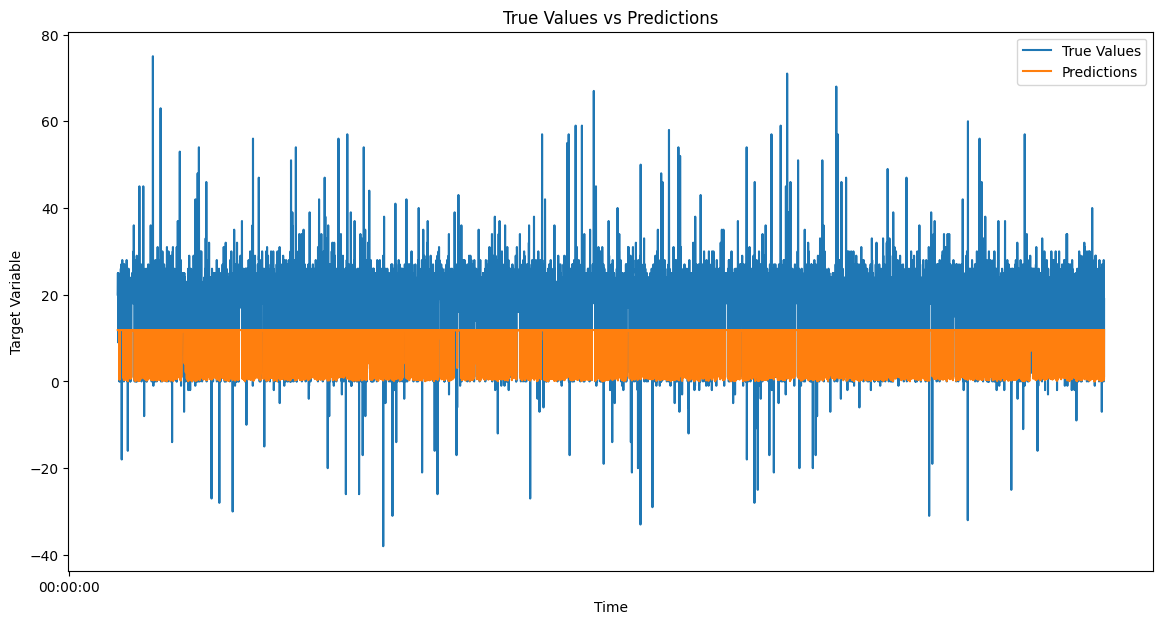

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.unsqueeze(1)).squeeze().numpy()

# Convert predictions and true values to pandas Series for easy plotting
pred_series = pd.Series(predictions, index=data.index[-len(predictions):])
true_series = pd.Series(y_test, index=data.index[-len(y_test):])

# Plot predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(true_series, label='True Values')
plt.plot(pred_series, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


In [ ]:
# Save the original indices before splitting
indices = data.index


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_scaled, y, indices, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


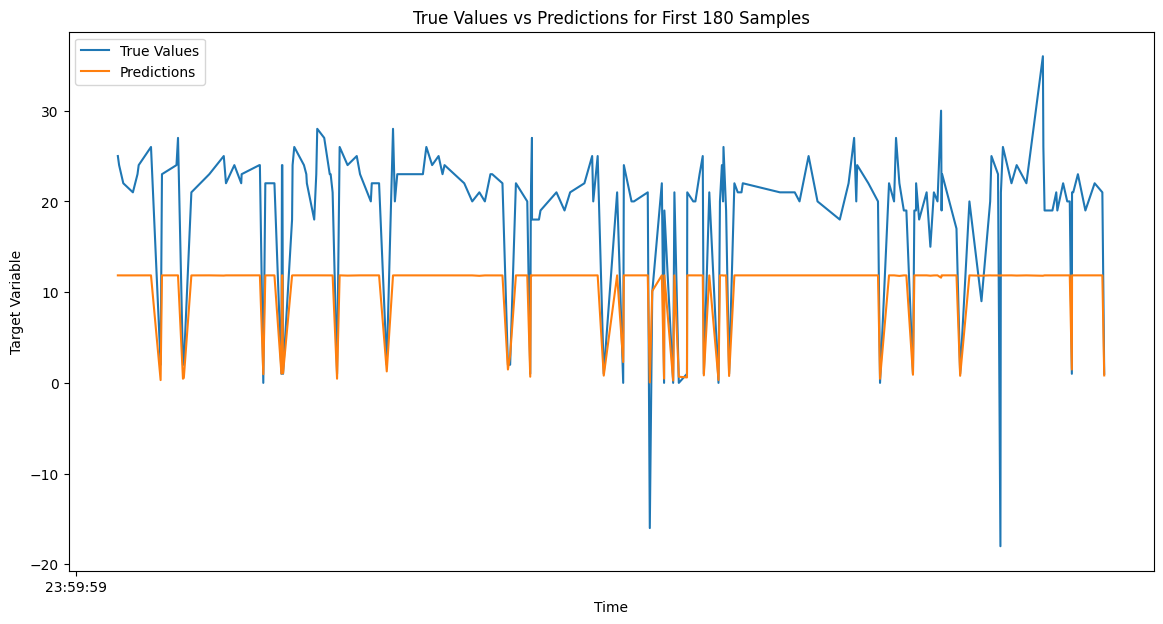

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure we have at least 180 samples in the test set
n_samples = 180
assert len(y_test_tensor) >= n_samples, "Test set does not contain enough samples."

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.unsqueeze(1)).squeeze().numpy()

# Extract the first 180 samples
predictions_180 = predictions[:n_samples]
true_values_180 = y_test[:n_samples]
indices_180 = idx_test[:n_samples]

# Convert to pandas Series for easy plotting
pred_series_180 = pd.Series(predictions_180, index=indices_180)
true_series_180 = pd.Series(true_values_180, index=indices_180)

# Sort the indices to ensure proper plotting
pred_series_180 = pred_series_180.sort_index()
true_series_180 = true_series_180.sort_index()

# Plot predictions vs true values for the first 180 samples
plt.figure(figsize=(14, 7))
plt.plot(true_series_180, label='True Values')
plt.plot(pred_series_180, label='Predictions')
plt.title('True Values vs Predictions for First 180 Samples')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


In [ ]:
file_name = 'file_address.pkl'

# Save the variable to a file using pickle
with open(file_name, 'wb') as file:
    pickle.dump(model_name , file)